In [ ]:
# -------------------------------
# Assignment 8: Unsupervised Learning – K-Means & PCA
# -------------------------------

# 1️⃣ Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from tkinter import Tk
from tkinter.filedialog import askopenfilename

# 2️⃣ Load Dataset
Tk().withdraw()
filename = askopenfilename(title="Select your CSV file")
data = pd.read_csv(filename)
data.columns = data.columns.str.strip()  # Remove spaces from column names

print("Dataset Shape:", data.shape)
print(data.head())

Dataset Shape: (85309, 31)
       Time        V1        V2        V3        V4        V5        V6  \
0  127294.0 -2.537331  1.890864 -0.840555 -1.102759 -2.105725  0.367811   
1  117632.0 -0.250839  1.104108  0.206089  0.417324  1.204079 -0.350694   
2  148330.0  0.568980 -2.520416 -1.114138  1.670652 -1.128945  0.398822   
3   67778.0  1.328892  0.226908 -0.308968  0.381772  0.238490 -0.282946   
4    6308.0  1.124863 -0.165691  1.337053  1.030033 -0.891116  0.202926   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0 -2.737844 -3.543314 -0.483147  ...  4.328165 -2.167329  1.022567 -0.241143   
1  1.369769 -0.133535 -0.957100  ...  0.133048  0.499501 -0.392572 -0.393364   
2  0.190403  0.161493  0.840595  ...  0.318037 -0.760732 -0.181332  0.595866   
3  0.029460 -0.079962  0.227173  ... -0.379270 -1.148959 -0.047403 -1.074464   
4 -0.825094  0.163280  2.301808  ... -0.216512 -0.195607  0.072785  0.045625   

        V25       V26       V27       V28

In [ ]:
# 3️⃣ Preprocessing
# Drop non-useful columns if present
columns_to_drop = ['TransactionID', 'TransactionDate']
columns_to_drop = [col for col in columns_to_drop if col in data.columns]
data = data.drop(columns=columns_to_drop)

# Encode categorical columns if any
label_encoder = LabelEncoder()
for col in data.select_dtypes(include='object').columns:
    data[col] = label_encoder.fit_transform(data[col])

# Fill missing numeric values
for col in data.select_dtypes(include='number').columns:
    data[col].fillna(data[col].median(), inplace=True)

# 4️⃣ Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

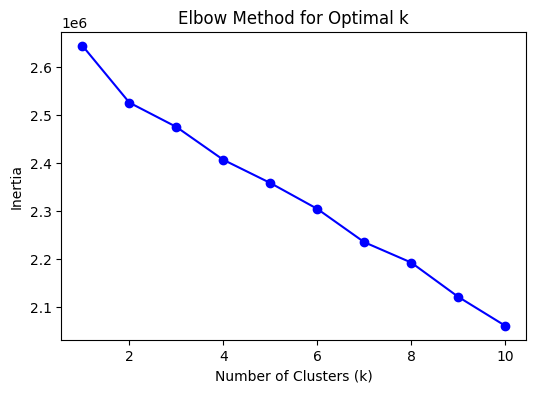

In [ ]:
# 5️⃣ K-Means Clustering
# Determine optimal number of clusters using Elbow Method
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

# Fit K-Means with chosen k (e.g., 3 clusters)
k_optimal = 3  # Adjust based on Elbow plot
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to original data
data['Cluster'] = clusters


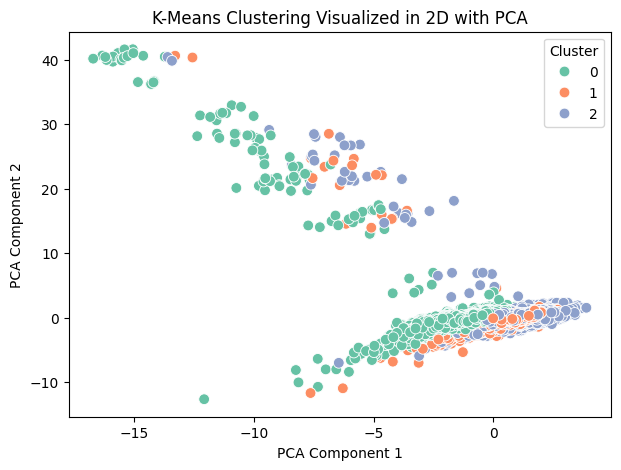


Cluster Counts:
Cluster
0    43261
2    22323
1    19725
Name: count, dtype: int64

Cluster Centers (scaled features):
[[-8.39770538e-01 -1.34988009e-01  6.25164546e-03  4.76344951e-01
   1.45617165e-01 -2.28977235e-01  7.07231989e-02 -9.55335389e-02
   5.92711617e-02 -7.39529400e-02 -4.61881799e-03  2.22649192e-01
  -5.04305789e-03 -5.48918357e-03  4.79401983e-02  2.75843300e-01
  -3.27079956e-02  5.98714372e-02 -9.47175016e-02  2.35098317e-02
   6.62641563e-02 -5.65887648e-02 -1.69720656e-01 -6.95516713e-02
   1.46823208e-02  2.92131716e-01  6.41453692e-02  3.81103092e-03
  -6.23402055e-04  4.04194337e-02  1.09276987e-02]
 [ 9.14208809e-01  9.24753039e-01 -4.09958126e-01 -8.83011097e-01
   1.64593582e-01 -3.15552465e-02 -1.09792528e-01 -1.81008816e-01
  -6.22357116e-02  3.33205859e-01  2.47083094e-01 -1.27228093e-01
   9.21948516e-02  5.24942290e-02 -6.91807377e-03 -1.54902948e-01
   5.02568344e-02 -1.02009504e-01  2.94517357e-02 -5.03242678e-02
  -9.36594532e-02  1.63171011e-02  1.

In [ ]:
# 6️⃣ PCA for 2D Visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(7,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette='Set2', s=60)
plt.title("K-Means Clustering Visualized in 2D with PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

# 7️⃣ Cluster Analysis
print("\nCluster Counts:")
print(data['Cluster'].value_counts())

print("\nCluster Centers (scaled features):")
print(kmeans.cluster_centers_)